In [19]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import pandas as pd
import json
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

with open(r'D:\dtc-dr\models\feature-selection\combined_results_23012024.json', 'r') as json_file:
    # Load the JSON data
    json_data = json.load(json_file)
df = pd.read_csv(
    r"D:\dtc-dr\data-analyse\continuous_factory_process.csv", delimiter=","
)

prefixes_to_match = ["Machine1", "Machine2", "Machine3"]

# Use list comprehension to filter columns based on prefixes
filtered_columns = [
    col
    for col in df.columns
    if any(col.startswith(prefix) for prefix in prefixes_to_match)
]

result = {}

for key, value in json_data.items():
    
    filtered_df = df[filtered_columns]

    indices = value["regression"][2]
    X = filtered_df.iloc[:, indices]

    y = df[key]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Create a linear regression model
    linear_reg_model = LinearRegression()

   # Define the cross-validation strategy (5-fold cross-validation) on the training set
    cv_train = KFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation on the training set
    r2_scores_train = cross_val_score(linear_reg_model, X_train, y_train, cv=cv_train, scoring='r2')
    mse_scores_train = -cross_val_score(linear_reg_model, X_train, y_train, cv=cv_train, scoring='neg_mean_squared_error')
    print(key)
    # Print the cross-validation results on the training set
    print(f'Training set - R-squared scores: {r2_scores_train}')
    print(f'Training set - Mean R-squared: {np.mean(r2_scores_train)}')
    print(f'Training set - Mean Squared Error scores: {mse_scores_train}')
    print(f'Training set - Mean MSE: {np.mean(mse_scores_train)}')

    # Define the cross-validation strategy (5-fold cross-validation) on the test set
    cv_test = KFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation on the test set
    r2_scores_test = cross_val_score(linear_reg_model, X_test, y_test, cv=cv_test, scoring='r2')
    mse_scores_test = -cross_val_score(linear_reg_model, X_test, y_test, cv=cv_test, scoring='neg_mean_squared_error')

    # Print the cross-validation results on the test set
    print(f'Test set - R-squared scores: {r2_scores_test}')
    print(f'Test set - Mean R-squared: {np.mean(r2_scores_test)}')
    print(f'Test set - Mean Squared Error scores: {mse_scores_test}')
    print(f'Test set - Mean MSE: {np.mean(mse_scores_test)}')
    print('\n')

    result[key] = {
        "r2_scores_train": np.mean(r2_scores_train),
        "mse_scores_train": np.mean(mse_scores_train),
        "r2_scores_test": np.mean(r2_scores_test),
        "mse_scores_test": np.mean(mse_scores_test),
        "indices": value["regression"][2],
    }

with open("cv_scores_linearregression.json", 'w') as json_file:
    json.dump(result, json_file, indent=2)  # 'indent' parameter is optional for better readability


Stage1.Output.Measurement0.U.Actual
Training set - R-squared scores: [0.05798765 0.05231981 0.08108445 0.04773909 0.01182721]
Training set - Mean R-squared: 0.05019164107222438
Training set - Mean Squared Error scores: [0.83289839 0.85651216 0.92422633 0.95796483 0.90172454]
Training set - Mean MSE: 0.8946652486677935
Test set - R-squared scores: [ 0.02162121  0.01768614 -0.00089228  0.0245981   0.01707277]
Test set - Mean R-squared: 0.016017186508359326
Test set - Mean Squared Error scores: [0.59479264 0.8855087  0.35752761 0.44743479 0.62666628]
Test set - Mean MSE: 0.5823860059404341


Stage1.Output.Measurement1.U.Actual
Training set - R-squared scores: [0.80065184 0.7623595  0.78689811 0.78157351 0.78161556]
Training set - Mean R-squared: 0.7826197037111307
Training set - Mean Squared Error scores: [ 9.51701342 11.3469541  10.15072171 10.44409306 10.27358941]
Training set - Mean MSE: 10.346474340089832
Test set - R-squared scores: [0.76663712 0.77295666 0.71789051 0.77593127 0.7178

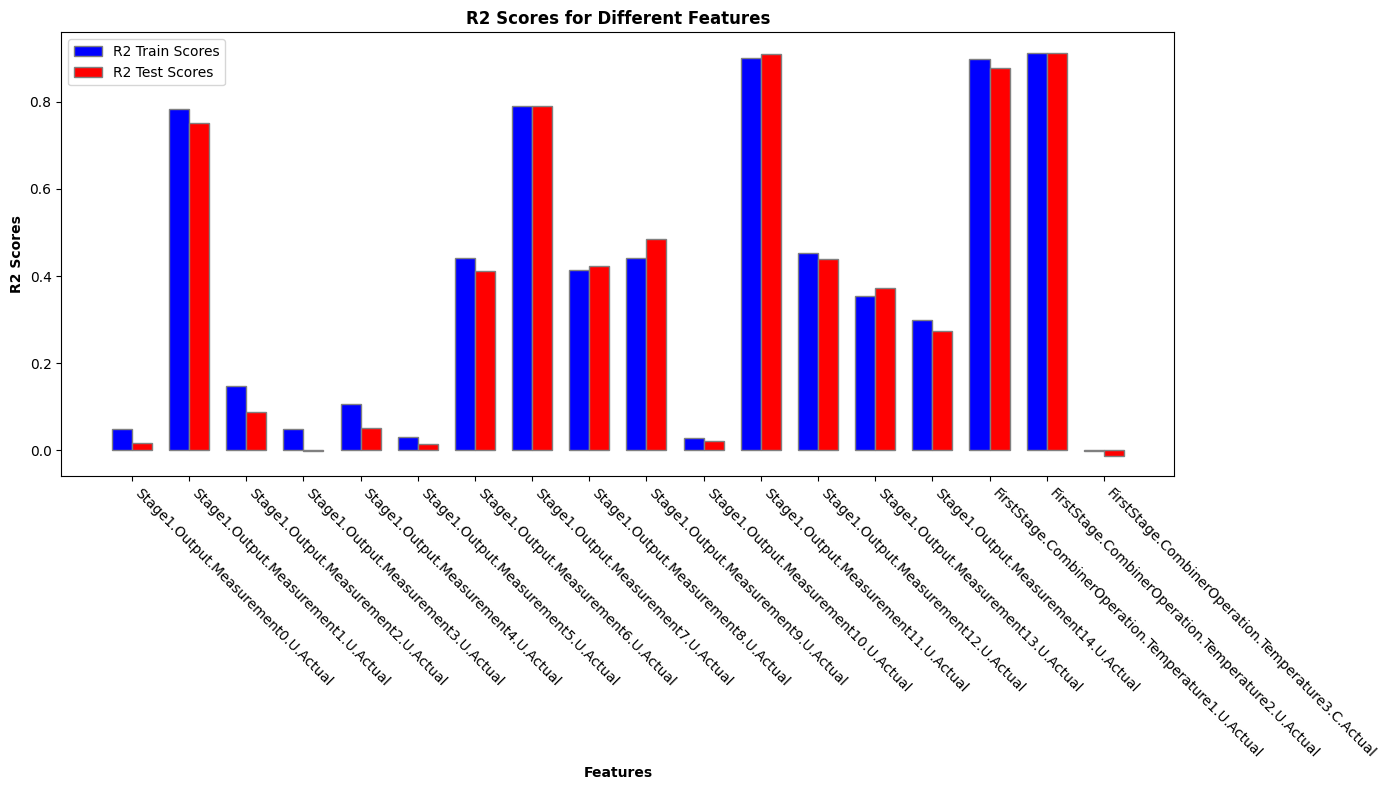

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'features' is a list of feature names
features = [key for key, value in result.items()]
r2_train_scores = [value["r2_scores_train"] for key, value in result.items()]
r2_test_scores = [value["r2_scores_test"] for key, value in result.items()]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on X-axis
r1 = np.arange(len(features))
r2 = [x + bar_width for x in r1]

# Increase the height of the chart by adjusting figsize
plt.figure(figsize=(14, 8))  # Adjust the height and width

# Plotting the bar chart
plt.bar(r1, r2_train_scores, color='b', width=bar_width, edgecolor='grey', label='R2 Train Scores')
plt.bar(r2, r2_test_scores, color='r', width=bar_width, edgecolor='grey', label='R2 Test Scores')

# Adding labels and title
plt.xlabel('Features', fontweight='bold')
plt.ylabel('R2 Scores', fontweight='bold')
plt.title('R2 Scores for Different Features', fontweight='bold')

# Rotating x-axis labels counterclockwise
plt.xticks([r + bar_width/2 for r in range(len(features))], features, rotation=-45, ha='left', fontsize=10)

# Adding legend
plt.legend()

# Adjusting layout to prevent label overlapping
plt.tight_layout()

# Display the plot
plt.show()
